In [1]:
from data_loading import load_annotated_6k_collection

In [2]:
tfs = load_annotated_6k_collection()

100%|██████████| 2748/2748 [00:13<00:00, 204.61it/s]


In [4]:
tfs['TBX5']['TBX5-3'].nt_seq

'ATGGCCGACGCAGACGAGGGCTTTGGCCTGGCGCACACGCCTCTGGAGCCTGACGCAAAAGACCTGCCCTGCGATTCGAAACCCGAGAGCGCGCTCGGGGCCCCCAGCAAGTCCCCGTCGTCCCCGCAGGCCGCCTTCACCCAGCAGGGCATGGAGGGAATCAAAGTGTTTCTCCATGAAAGAGAACTGTGGCTAAAATTCCACGAAGTGGGCACGGAAATGATCATAACCAAGGCTGGAAGGCGGATGTTTCCCAGTTACAAAGTGAAGGTGACGGGCCTTAATCCCAAAACGAAGTACATTCTTCTCATGGACATTGTACCTGCCGACGATCACAGATACAAATTCGCAGATAATAAATGGTCTGTGACGGGCAAAGCTGAGCCCGCCATGCCTGGCCGCCTGTACGTGCACCCAGACTCCCCCGCCACCGGGGCGCATTGGATGAGGCAGCTCGTCTCCTTCCAGAAACTCAAGCTCACCAACAACCACCTGGACCCATTTGGGCATATTATTCTAAATTCCATGCACAAATACCAGCCTAGATTACACATCGTGAAAGCGGATGAAAATAATGGATTTGGCTCAAAAAATACAGCGTTCTGCACTCACGTCTTTCCTGAGACTGCGTTTATAGCAGTGACTTCCTACCAGAACCACAAGATCACGCAATTAAAGATTGAGAATAATCCCTTTGCCAAAGGATTTCGGGGCAGTGATGACATGGAGCTGCACAGAATGTCAAGAATGCAAAGTAAAGAATATCCCGTGGTCCCCAGGAGCACCGTGAGGCAAAAAGTGGCCTCCAACCACAGTCCTTTCAGCAGCGAGTCTCGAGCTCTCTCCACCTCATCCAATTTGGGGTCCCAATACCAGTGTGAGAATGGTGTTTCCGGCCCCTCCCAGGACCTCCTGCCTCCACCCAACCCATACCCACTGCCCCAGGAGCATAGCCAAATTTACCATTGTACCAAGAGGAAAGGTGAGTGTGATCACCCC

In [14]:
len(tfs['TBX5']['TBX5-3'].CDS_nt_seq)

349.0

In [11]:
tfs['TBX5']['TBX5-3'].clone_nt_seq == tfs['TBX5']['TBX5-3'].CDS_nt_seq

True

KeyError: 'predicted_aligned_error'

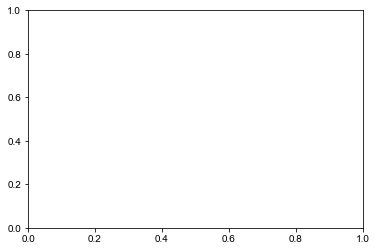

In [16]:
# python 3.7.4 used on the HMS RC machine to generate the files

# improve ticks

import pickle
import json
from pathlib import Path

from matplotlib import pyplot as plt


def predicted_aligned_error_heatmap(in_dir, fig_dir):
    in_dir = Path(in_dir)  # in case passed as string
    fig_dir = Path(fig_dir)  # in case passed as string
    out_path = fig_dir / '{}_predicted-aligned-error.pdf'.format(in_dir.stem)
    if out_path.exists():
        print(out_path, 'already exists')
        return
    """
    ranking_path = in_dir / 'ranking_debug.json'
    if not ranking_path.exists():
        print(ranking_path, 'does not exist')
        return
    with open(ranking_path, 'r') as f:
        ranking = json.load(f)
    with open(in_dir / 'result_{}.pkl'.format(ranking['order'][0]), 'rb') as f:
    """
    with open(in_dir / 'result_model_1.pkl', 'rb') as f:
        data = pickle.load(f)
    #with open(in_dir / 'msas/chain_id_map.json', 'r') as f:
    #    aa_seqs = json.load(f)

    fig, ax = plt.subplots(1, 1)
    im = ax.imshow(data['predicted_aligned_error'])
    cbar = ax.figure.colorbar(im, ax=ax, label='Predicted aligned error (Angstroms)')
    """
    ax.axvline(x=len(aa_seqs['A']['sequence']) - 0.5,
            color='black')
    ax.axhline(y=len(aa_seqs['A']['sequence']) - 0.5,
            color='black')
    pad = ax.get_xlim()[1] * 0.1
    ax.text(s=aa_seqs['A']['description'].split()[1],
            x=len(aa_seqs['A']['sequence']) / 2,
            y=ax.get_ylim()[0] + pad,
            ha='center',
            va='top')
    ax.text(s=aa_seqs['B']['description'].split()[1],
            x=len(aa_seqs['A']['sequence']) + len(aa_seqs['B']['sequence']) / 2,
            y=ax.get_ylim()[0] + pad,
            ha='center',
            va='top')
    ax.text(s=aa_seqs['A']['description'].split()[1],
            y=len(aa_seqs['A']['sequence']) / 2,
            x=ax.get_xlim()[0] - pad,
            rotation=90,
            va='center',
            ha='right')
    ax.text(s=aa_seqs['B']['description'].split()[1],
            y=len(aa_seqs['A']['sequence']) + len(aa_seqs['B']['sequence']) / 2,
            x=ax.get_xlim()[0] - pad,
            rotation=90,
            va='center',
            ha='right')
    """
    fig.savefig(out_path, bbox_inches='tight')
    plt.close(fig)


predicted_aligned_error_heatmap(in_dir='../../data/internal/alphafold/casp14/TBX5-3',
                                fig_dir='../../figures')

In [28]:
with open('../../data/internal/alphafold/casp14/TBX5-3/result_model_1.pkl', 'rb') as f:
    data = pickle.load(f)
data['plddt'].shape

(349,)

In [21]:
data.keys()

dict_keys(['distogram', 'experimentally_resolved', 'masked_msa', 'predicted_lddt', 'structure_module', 'plddt'])

In [23]:
with open('/Users/lukelambourne/work/for_others/for_Florent/output/CTI6_CTI6/result_model_1_multimer_v2_pred_0.pkl', 'rb') as f:
    data = pickle.load(f)
data['predicted_aligned_error'].shape

(1012, 1012)

In [29]:
tfs['TBX5']['TBX5-3'].aa_seq

'MADADEGFGLAHTPLEPDAKDLPCDSKPESALGAPSKSPSSPQAAFTQQGMEGIKVFLHERELWLKFHEVGTEMIITKAGRRMFPSYKVKVTGLNPKTKYILLMDIVPADDHRYKFADNKWSVTGKAEPAMPGRLYVHPDSPATGAHWMRQLVSFQKLKLTNNHLDPFGHIILNSMHKYQPRLHIVKADENNGFGSKNTAFCTHVFPETAFIAVTSYQNHKITQLKIENNPFAKGFRGSDDMELHRMSRMQSKEYPVVPRSTVRQKVASNHSPFSSESRALSTSSNLGSQYQCENGVSGPSQDLLPPPNPYPLPQEHSQIYHCTKRKGECDHPWSICFLSYLFLSLGWG'